### Ads Analyse

In [6]:
# Importe
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

meta = pd.read_csv("../../Data/Sanitized/Meta.csv")


alpha = pd.read_csv("../../Data/Sanitized/Alpha.csv")

In [7]:
meta.head(11)
meta.dtypes

Name der Kampagne             object
Tag                           object
Auslieferungsstatus           object
Auslieferungsebene            object
Reichweite                     int64
Impressionen                   int64
Frequenz                     float64
Ergebnistyp                   object
Ergebnisse                     int64
Ausgegebener Betrag (EUR)    float64
Kosten pro Ergebnis          float64
Start                        float64
Ende                         float64
Berichtsstart                 object
Berichtsende                  object
dtype: object

In [10]:
alpha.head()
alpha.dtypes

Tag                object
Kampagne           object
Impressionen      float64
Klicks              int64
Währungscode       object
Kosten            float64
CTR                object
Durchschn. CPC     object
dtype: object

In [42]:
ac = round(alpha.Kosten.sum(),2 )
mc = round(meta['Ausgegebener Betrag (EUR)'].sum(), 2)
summary = f"Kosten Σ Meta:{mc} Kosten Σ Alpha:{ac}" 
summary

'Kosten Σ Meta:190.77 Kosten Σ Alpha:187.16'

In [26]:
meta['Datum'] = pd.to_datetime(meta['Berichtsstart'], format="%Y-%m-%d")
meta.dtypes
meta.to_csv("../../Data/Sanitized/Meta_s.csv", index=False)

In [19]:
alpha['Datum'] = pd.to_datetime(alpha['Tag'], format="%d.%m.%Y" )
alpha.dtypes
alpha.to_csv("../../Data/Sanitized/Alpha_s.csv", index=False)

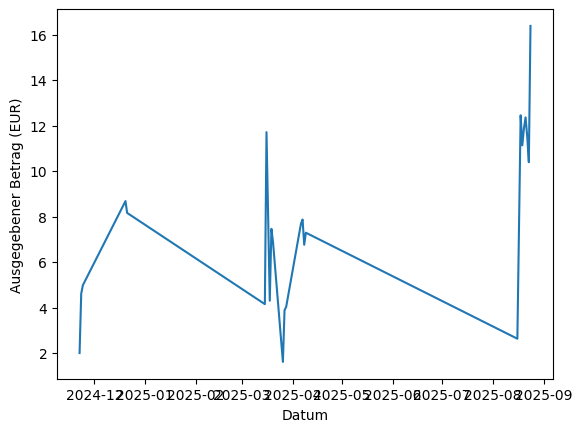

In [28]:
sns.lineplot(meta, x="Datum", y="Ausgegebener Betrag (EUR)")
plt.show()

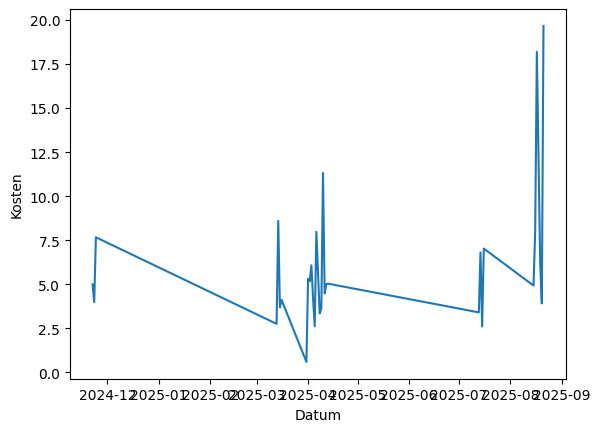

In [43]:
sns.lineplot(alpha, x="Datum", y="Kosten")
plt.show()

In [55]:
meta['CRT_Manuell'] = round(meta['Ergebnisse']/meta['Impressionen'], 4)
meta['CPC_Manuell'] = round(meta['Ausgegebener Betrag (EUR)']/meta['Ergebnisse'], 4)


meta_4agg = meta[['Datum', 'Impressionen',	'Ergebnisse','Ausgegebener Betrag (EUR)', 'CPC_Manuell', 'CRT_Manuell']]
meta_4agg['Provider'] = 'Meta'
meta_4agg.head()
meta_4agg.to_csv("../../Data/Sanitized/Meta_agg.csv", index=False)
#meta.head()

/var/folders/tk/nqpvyn3j2n199g87n7gts0_w0000gn/T/ipykernel_4073/2714477072.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_4agg['Provider'] = 'Meta'


In [56]:
alpha['CRT_Manuell'] = round(alpha['Klicks']/alpha['Impressionen'], 4)
alpha['CPC_Manuell'] = round(alpha['Kosten']/alpha['Klicks'], 4)

#alpha
alpha.head()
# 	Tag	Kampagne	
alpha_4agg = alpha[['Datum', 'Impressionen',	'Klicks','Kosten', 'CPC_Manuell', 'CRT_Manuell']]
alpha_4agg['Provider'] = 'Alpha'
alpha_4agg.to_csv("../../Data/Sanitized/Alpha_agg.csv", index=False)

/var/folders/tk/nqpvyn3j2n199g87n7gts0_w0000gn/T/ipykernel_4073/776587068.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alpha_4agg['Provider'] = 'Alpha'


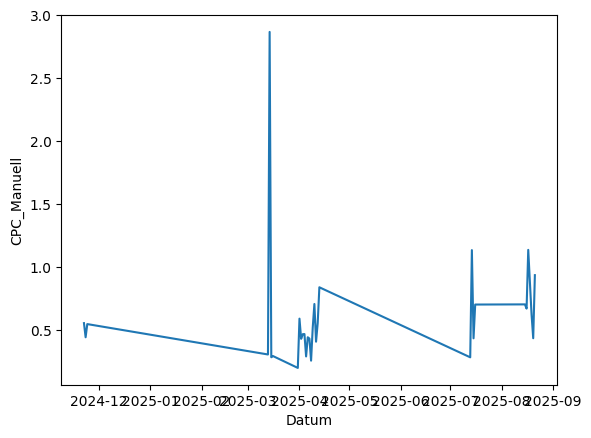

In [44]:
sns.lineplot(alpha, x="Datum", y="CPC_Manuell")
plt.show()